# JuliaML: LossFunctions.jl 


## About JuliaML

JuliaML contains several repositories with different building blocks for machine learning.
Some of them are:

- **MLDataUtils**: https://github.com/JuliaML/MLDataUtils.jl
   - Package for splitting the data. Tools for crossvalidation can be found here.
   
   
- **PenaltyFunctions**:  https://github.com/JuliaML/PenaltyFunctions.jl
    - Package with build in penalty functions.
    
   
- **LossFunctions**:  https://github.com/JuliaML/LossFunctions.jl
    - Package with build in penalty functions.

In [63]:
using LossFunctions
using BenchmarkTools
using PyPlot

INFO: Recompiling stale cache file /Users/macpro/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


## About LossFunctions

The package `LossFunctions` give us a set of loss functions as well as its derivatives that can be used to implement different models and learning algorithms.




In [47]:
typeof(AvgMode)

Module

In [48]:
typeof(AvgMode.Sum())

LossFunctions.AvgMode.Sum

In [49]:
println(typeof(AvgMode.Sum())) 
println(typeof(AvgMode.Mean()))

LossFunctions.AvgMode.Sum
LossFunctions.AvgMode.Mean


In [50]:
l = L1DistLoss()

# |.2 - .1|
value(l, .1, .2)  

# sign(.2 - .1)
deriv(l, .1, .2)  

y = randn(100)
yhat = randn(100)

# vector of value mapped to y[i], yhat[i]
value(l, y, yhat) 

# sum(value(l, y, yhat)), but better
value(l, y, yhat, AvgMode.Sum())  

# mean(value(l, y, yhat)), but better
value(l, y, yhat, AvgMode.Mean()) 

1.1754503654088773

## Linear regression Example


### Implementing Gradient descent

In [115]:
function f(l::Loss, x::Matrix, y::Vector; maxit=20, s=.5)
    n, p = size(x)
    β = zeros(p)
    for i in 1:maxit
        println("iter" ,i, " ", loss(y, x * β, AvgMode.Mean()))
        β -= (s / n) * x' * deriv(l, y, x * β)
    end
    β
end

f (generic function with 1 method)

In [116]:
# make some fake data
x = randn(1000, 3)
y = x * [1.0, 2.0, 3.0] + randn(1000);

In [117]:
loss = L2DistLoss() 
w = f(loss, x, y)

iter1 14.647844377014554
iter2 1.0416621586103936
iter3 1.0309292506731593
iter4 1.0309144373784984
iter5 1.0309143846242608
iter6 1.030914384323161
iter7 1.0309143843212667
iter8 1.0309143843212545
iter9 1.0309143843212545
iter10 1.0309143843212545
iter11 1.0309143843212545
iter12 1.0309143843212545
iter13 1.0309143843212545
iter14 1.0309143843212545
iter15 1.0309143843212543
iter16 1.0309143843212545
iter17 1.0309143843212545
iter18 1.0309143843212545
iter19 1.0309143843212545
iter20 1.0309143843212545


3-element Array{Float64,1}:
 1.00379
 2.01234
 2.95395

In [119]:
mean(loss(y,x*w))

1.030914384321254

In [120]:
loss(y, x*w, AvgMode.Mean())

1.0309143843212545

In [121]:
@benchmark loss(y, x*w, AvgMode.Mean())

BenchmarkTools.Trial: 
  memory estimate:  7.98 KiB
  allocs estimate:  3
  --------------
  minimum time:     5.167 μs (0.00% GC)
  median time:      5.594 μs (0.00% GC)
  mean time:        6.889 μs (10.54% GC)
  maximum time:     456.143 μs (96.47% GC)
  --------------
  samples:          10000
  evals/sample:     6

### Example with plottable data

In [123]:
x = Array(1:100)
y = sin.(x) .+ x;

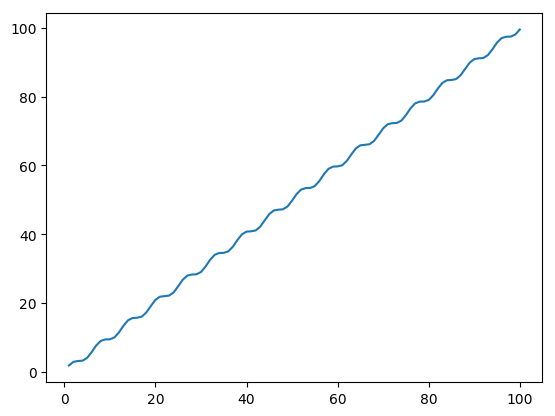

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1341f8150>

In [124]:
PyPlot.plot(x,y)

In [125]:
X = hcat(ones(size(x)), x);

In [126]:
loss = L2DistLoss() 
w = f(loss, X, y, s=0.01)

iter1 3381.90683893839
iter2 1.5036767460371573e7
iter3 6.686698882748168e10
iter4 2.9735076743291856e14
iter5 1.322288926778626e18
iter6 5.880085735026118e21
iter7 2.6148149281935374e25
iter8 1.1627818737363025e29
iter9 5.1707739286305365e32
iter10 2.2993911089354232e36
iter11 1.0225160768634831e40
iter12 4.547026051293875e43
iter13 2.022016707508998e47
iter14 8.99170473035252e50
iter15 3.998520568974287e54
iter16 1.778101841638614e58
iter17 7.907039878125887e61
iter18 3.516181029128031e65
iter19 1.5636103042558877e69
iter20 6.953217605469784e72


2-element Array{Float64,1}:
 -4.51127e34
 -3.02233e36

In [132]:
X

100×2 Array{Float64,2}:
 1.0    1.0
 1.0    2.0
 1.0    3.0
 1.0    4.0
 1.0    5.0
 1.0    6.0
 1.0    7.0
 1.0    8.0
 1.0    9.0
 1.0   10.0
 1.0   11.0
 1.0   12.0
 1.0   13.0
 ⋮         
 1.0   89.0
 1.0   90.0
 1.0   91.0
 1.0   92.0
 1.0   93.0
 1.0   94.0
 1.0   95.0
 1.0   96.0
 1.0   97.0
 1.0   98.0
 1.0   99.0
 1.0  100.0

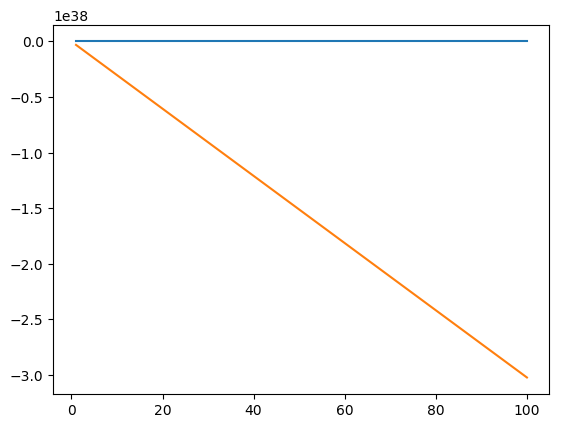

(Any[PyObject <matplotlib.lines.Line2D object at 0x13430d0d0>], Any[PyObject <matplotlib.lines.Line2D object at 0x13430d2d0>])

In [128]:
PyPlot.plot(x,y), PyPlot.plot(x,predictions)

#### We can use other loss functions

In [30]:
loss = L2DistLoss() 
w = f(loss, x, y)

iter1 14.353523745341679
iter2 1.1460774744334574
iter3 1.0913561548603
iter4 1.091099735433221
iter5 1.0910985124763122
iter6 1.0910985066296672
iter7 1.0910985066017056
iter8 1.0910985066015721
iter9 1.0910985066015713
iter10 1.0910985066015715
iter11 1.0910985066015715
iter12 1.0910985066015715
iter13 1.0910985066015717
iter14 1.0910985066015715
iter15 1.0910985066015715
iter16 1.0910985066015713
iter17 1.0910985066015713
iter18 1.0910985066015713
iter19 1.0910985066015713
iter20 1.0910985066015713


3-element Array{Float64,1}:
 0.942266
 2.01573 
 3.03251 

In [31]:
loss = L1DistLoss()
f(loss, x, y)

iter1 3.0409519494091537
iter2 2.7588036501131885
iter3 2.4826529878898858
iter4 2.2173607791668157
iter5 1.9612250260477835
iter6 1.7163716262161344
iter7 1.4878366411281707
iter8 1.282291198253435
iter9 1.109785624182497
iter10 0.9861526728612263
iter11 0.9115828250401519
iter12 0.8681253325037533
iter13 0.8453183543026592
iter14 0.8344781988989277
iter15 0.8285378571343611
iter16 0.8260383555173255
iter17 0.8254260224950342
iter18 0.8253623202302944
iter19 0.8253562627376893
iter20 0.8253541305526848


3-element Array{Float64,1}:
 0.921902
 2.0299  
 3.01322 

In [32]:
loss = HuberLoss(2.)
f(loss, x, y)

iter1 4.361005694263827
iter2 3.3434225329918585
iter3 2.4170891088071125
iter4 1.6375360897285822
iter5 1.074535289169582
iter6 0.7512836671844539
iter7 0.6099876985129103
iter8 0.560144771861272
iter9 0.5435118027437276
iter10 0.5381239784335129
iter11 0.5364063291465369
iter12 0.5358568107178217
iter13 0.5356801552246012
iter14 0.535623308103915
iter15 0.5356050087681917
iter16 0.535599116329132
iter17 0.5355972184159407
iter18 0.5355966069551145
iter19 0.5355964099114405
iter20 0.5355963464003953


3-element Array{Float64,1}:
 0.936426
 2.02007 
 3.0299  

In [33]:
size(x)

(1000, 3)